# ngEHT conversion guide

In [1]:
from importlib.metadata import version
import os

try:
    import xradio

    print("XRADIO version", version("xradio"), "already installed.")
except ImportError as e:
    print(e)
    print("Installing XRADIO")

    os.system("pip install xradio")

    import xradio

    print("xradio version", version("xradio"), " installed.")

XRADIO version 0.0.49 already installed.


## Download dataset

fitsidi from https://almascience.eso.org/almadata/ec/eht/2016.1.01114.V/group.uid___A001_X87c_X245.ec_jlgomez.e17a10-7-hi-oj287-3C279-fits.tgz

```python
importfitsidi('E17A10.0.bin0000.source0000.FITS',vis='E17A10.0.bin0000.source0000.ms')
mstransform(vis='E17A10.0.bin0000.source0000.ms',outputvis='ngEHT_E17A10.0.bin0000.source0000_split_lsrk.ms',spw='8:55~61,29:20~27', regridms=True,outframe='lsrk',datacolumn='all')
```

In [2]:
import toolviper

toolviper.utils.data.download(file="ngEHT_E17A10.0.bin0000.source0000_split.ms")

[2025-04-07 11:08:24,544]  WARNING   toolviper:  File exists: /home/fedemp/ws_xradio_dev/venv_xradio_python312/lib/python3.12/site-packages/toolviper/utils/data/.dropbox 
[2025-04-07 11:08:24,544]     INFO   toolviper:  Updating file metadata information ...  
 

 Download List                               
 ──────────────────────────────────────────── 
  ngEHT_E17A10.0.bin0000.source0000_split.ms

ngEHT_E17A10.0.bin0000.source0000_split.ms.zip:   0%|          | 0.00/10.6M [00:00<?, ?iB/s]

## Convert to Processing Set

In [3]:
from xradio.measurement_set import convert_msv2_to_processing_set

ms_file = "ngEHT_E17A10.0.bin0000.source0000_split.ms"

main_chunksize = {"frequency": 1, "time": 20}  # baseline, polarization
outfile = "ngEHT_E17A10.0.bin0000.source0000_split_lsrk.ps.zarr"
convert_msv2_to_processing_set(
    in_file=ms_file,
    out_file=outfile,
    parallel_mode="none",
    overwrite=True,
    main_chunksize=main_chunksize,
)

Output file:  ngEHT_E17A10.0.bin0000.source0000_split_lsrk.ps.zarr
[2025-04-07 11:08:30,439]     INFO   toolviper:  Partition scheme that will be used: ['DATA_DESC_ID', 'OBSERVATION_ID', 'FIELD_ID'] 
[2025-04-07 11:08:30,446]     INFO   toolviper:  Number of partitions: 2 
[2025-04-07 11:08:30,447]     INFO   toolviper:  OBSERVATION_ID [0], DDI [0], STATE [-1], FIELD [0], SCAN [0] 
[2025-04-07 11:08:30,645]  WARNING   toolviper:  Source_id is -1. No source information will be included in the field_and_source_xds. 
[2025-04-07 11:08:31,113]     INFO   toolviper:  OBSERVATION_ID [0], DDI [1], STATE [-1], FIELD [0], SCAN [0] 
[2025-04-07 11:08:31,303]  WARNING   toolviper:  Source_id is -1. No source information will be included in the field_and_source_xds. 


## Processing Set

In [4]:
from xradio.measurement_set import open_processing_set

ps_xdt = open_processing_set(ps_store=outfile)
ps_xdt.xr_ps.summary()

,name,intents,shape,polarization,scan_name,spw_name,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
0,ngEHT_E17A10.0.bin0000.source0000_split_0,[obs_0],"(2250, 20, 7, 4)","[RR, RL, LR, LL]",[0],spw_0,[3C279_0],[Unknown],[],"[fk5, 12h56m11.17s, -5d47m21.52s]",2.286593e+11,2.286623e+11
1,ngEHT_E17A10.0.bin0000.source0000_split_1,[obs_0],"(2250, 20, 8, 4)","[RR, RL, LR, LL]",[0],spw_1,[3C279_0],[Unknown],[],"[fk5, 12h56m11.17s, -5d47m21.52s]",2.298723e+11,2.298758e+11


In [5]:
ms_xdt = ps_xdt["ngEHT_E17A10.0.bin0000.source0000_split_0"]
ms_xdt

<xarray.DataTree 'ngEHT_E17A10.0.bin0000.source0000_split_0'>
Group: /ngEHT_E17A10.0.bin0000.source0000_split_0
│   Dimensions:                     (time: 2250, baseline_id: 20, frequency: 7,
│                                    polarization: 4, uvw_label: 3)
│   Coordinates:
│       baseline_antenna1_name      (baseline_id) <U2 160B ...
│       baseline_antenna2_name      (baseline_id) <U2 160B ...
│     * baseline_id                 (baseline_id) int64 160B 0 1 2 3 ... 16 17 18 19
│       field_name                  (time) <U27 243kB ...
│     * frequency                   (frequency) float64 56B 2.287e+11 ... 2.287e+11
│     * polarization                (polarization) <U2 32B 'RR' 'RL' 'LR' 'LL'
│       scan_name                   (time) <U21 189kB '0' '0' '0' ... '0' '0' '0'
│     * time                        (time) float64 18kB 1.492e+09 ... 1.492e+09
│     * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
│   Data variables:
│       EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 360kB ...
│       FLAG                        (time, baseline_id, frequency, polarization) bool 1MB ...
│       TIME_CENTROID               (time, baseline_id) float64 360kB ...
│       UVW                         (time, baseline_id, uvw_label) float64 1MB ...
│       VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 10MB ...
│       WEIGHT                      (time, baseline_id, frequency, polarization) float32 5MB ...
│   Attributes:
│       creation_date:     2025-04-07T09:08:30.473847+00:00
│       creator:           {'software_name': 'xradio', 'version': '0.0.49'}
│       data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'date': '20...
│       observation_info:  {'intents': ['obs_0'], 'observer': ['PLUTO'], 'project...
│       processor_info:    {'sub_type': '', 'type': ''}
│       schema_version:    4.0.-9988
│       type:              visibility
├── Group: /ngEHT_E17A10.0.bin0000.source0000_split_0/antenna_xds
│       Dimensions:                 (antenna_name: 6, cartesian_pos_label: 3,
│                                    receptor_label: 2)
│       Coordinates:
│         * antenna_name            (antenna_name) <U2 48B 'AA' 'AP' 'AZ' 'LM' 'PV' 'SP'
│         * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
│           mount                   (antenna_name) <U16 384B ...
│           polarization_type       (antenna_name, receptor_label) <U1 48B ...
│         * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
│           station                 (antenna_name) <U2 48B ...
│           telescope_name          (antenna_name) <U4 96B ...
│       Data variables:
│           ANTENNA_DISH_DIAMETER   (antenna_name) float64 48B ...
│           ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 144B ...
│           ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 96B ...
│       Attributes:
│           overall_telescope_name:  VLBA
│           relocatable_antennas:    False
│           type:                    antenna
└── Group: /ngEHT_E17A10.0.bin0000.source0000_split_0/field_and_source_xds_base
        Dimensions:             (field_name: 1, sky_dir_label: 2)
        Coordinates:
          * field_name          (field_name) <U27 108B '3C279_0'
          * sky_dir_label       (sky_dir_label) <U3 24B 'ra' 'dec'
            source_name         (field_name) <U7 28B 'Unknown'
        Data variables:
            FIELD_PHASE_CENTER  (field_name, sky_dir_label) float64 16B -2.896 -0.101
        Attributes:
            type:     field_and_source

In [6]:
ms_xdt.antenna_xds

<xarray.DataTree 'antenna_xds'>
Group: /ngEHT_E17A10.0.bin0000.source0000_split_0/antenna_xds
    Dimensions:                 (time: 2250, baseline_id: 20, frequency: 7,
                                 polarization: 4, uvw_label: 3, antenna_name: 6,
                                 cartesian_pos_label: 3, receptor_label: 2)
    Coordinates:
      * antenna_name            (antenna_name) <U2 48B 'AA' 'AP' 'AZ' 'LM' 'PV' 'SP'
      * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
        mount                   (antenna_name) <U16 384B ...
        polarization_type       (antenna_name, receptor_label) <U1 48B ...
      * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
        station                 (antenna_name) <U2 48B ...
        telescope_name          (antenna_name) <U4 96B ...
    Inherited coordinates:
      * baseline_id             (baseline_id) int64 160B 0 1 2 3 4 ... 16 17 18 19
      * frequency               (frequency) float64 56B 2.287e+11 ... 2.287e+11
      * polarization            (polarization) <U2 32B 'RR' 'RL' 'LR' 'LL'
      * time                    (time) float64 18kB 1.492e+09 ... 1.492e+09
      * uvw_label               (uvw_label) <U1 12B 'u' 'v' 'w'
    Data variables:
        ANTENNA_DISH_DIAMETER   (antenna_name) float64 48B ...
        ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 144B ...
        ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 96B ...
    Attributes:
        overall_telescope_name:  VLBA
        relocatable_antennas:    False
        type:                    antenna

In [7]:
ms_xdt.xr_ms.get_field_and_source_xds()

<xarray.DatasetView> Size: 18kB
Dimensions:             (field_name: 1, sky_dir_label: 2, baseline_id: 20,
                         frequency: 7, polarization: 4, time: 2250, uvw_label: 3)
Coordinates:
  * baseline_id         (baseline_id) int64 160B 0 1 2 3 4 5 ... 15 16 17 18 19
  * frequency           (frequency) float64 56B 2.287e+11 ... 2.287e+11
  * polarization        (polarization) <U2 32B 'RR' 'RL' 'LR' 'LL'
  * time                (time) float64 18kB 1.492e+09 1.492e+09 ... 1.492e+09
  * uvw_label           (uvw_label) <U1 12B 'u' 'v' 'w'
  * field_name          (field_name) <U27 108B '3C279_0'
  * sky_dir_label       (sky_dir_label) <U3 24B 'ra' 'dec'
    source_name         (field_name) <U7 28B 'Unknown'
Data variables:
    FIELD_PHASE_CENTER  (field_name, sky_dir_label) float64 16B -2.896 -0.101
Attributes:
    type:     field_and_source

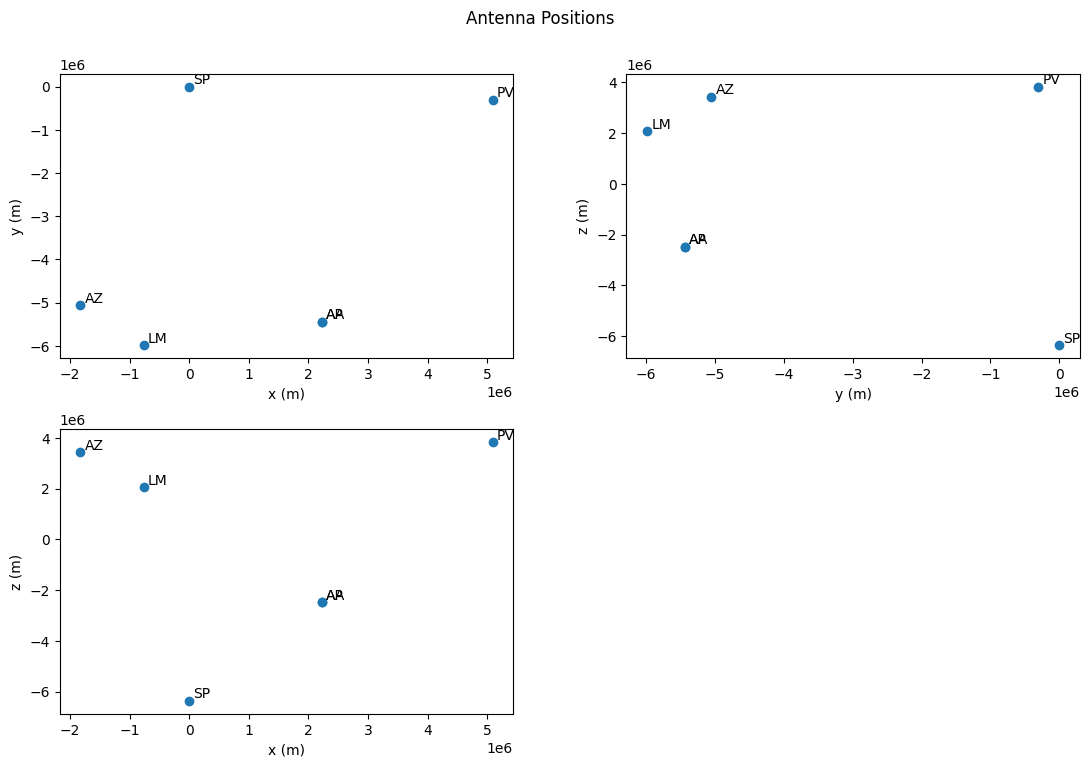

In [10]:
ps_xdt.xr_ps.plot_antenna_positions(label_all_antennas=True)

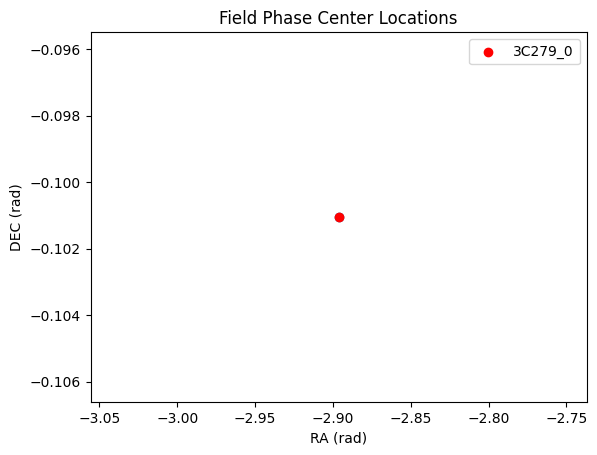

In [9]:
ps_xdt.xr_ps.plot_phase_centers()